<a href="https://colab.research.google.com/github/HarveCriqui/Colab/blob/main/Final_Project_Predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project:** Investing in Austin
  **Analysts:** Jake Rockaway, Harve Criqui

  **Date:** 12/3/2023

### Using the data provided, you need to produce a report that will provide your client with an overview of the Airbnb rental market in Austin.  Your report should address the following issues that are of interest to the client:

1. What are the key factors driving the nightly rental price for units in the Austin area?

2. What are the key factors driving the probability of keeping a unit booked in the Austin area?  To answer this question, you can classify a unit as “booked” if the 90-day availability for the property is less than 40%.

3. How important are guest reviews and ratings?  Is there anything the host could do to improve those ratings?

4. Segment the Airbnb properties in the Austin area into different groups.  Provide a profile of each segment.  Which segments command the highest nightly rates?  Which segments get the best guest ratings?  Which segments have the highest percentage of “booked” units?


In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

# 1. Reading and cleaning the Data

In [ ]:
# Reading the Data
airbnb = pd.read_csv('/content/airbnb_listings_austin.csv')

In [ ]:
# Gathering Information
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5835 non-null   int64  
 1   listing_url                  5835 non-null   object 
 2   name                         5835 non-null   object 
 3   summary                      5373 non-null   object 
 4   space                        4475 non-null   object 
 5   description                  5832 non-null   object 
 6   experiences_offered          5835 non-null   object 
 7   neighborhood_overview        3572 non-null   object 
 8   notes                        2412 non-null   object 
 9   transit                      3492 non-null   object 
 10  host_id                      5835 non-null   int64  
 11  host_name                    5820 non-null   object 
 12  host_since                   5820 non-null   object 
 13  host_location     

In [ ]:
# Count of Nulls in each Column
airbnb.isnull().sum()

id                                0
listing_url                       0
name                              0
summary                         462
space                          1360
description                       3
experiences_offered               0
neighborhood_overview          2263
notes                          3423
transit                        2343
host_id                           0
host_name                        15
host_since                       15
host_location                    25
host_about                     1861
host_response_time             1658
host_response_rate             1658
host_is_superhost                15
host_listings_count              15
host_has_profile_pic             15
host_identity_verified           15
neighbourhood                  1035
city                              0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        46
bedrooms                    

In [ ]:
# Percent of Nulls in each column
percent_missing = airbnb.isnull().sum() * 100 / len(airbnb)
percent_missing = percent_missing.reset_index()
percent_missing.columns = ['column','%_Null']
percent_missing = percent_missing.sort_values(by='%_Null', ascending = False)
percent_missing

,column,%_Null
31,square_feet,94.824336
33,weekly_price,61.833762
8,notes,58.663239
34,security_deposit,52.527849
9,transit,40.154242
7,neighborhood_overview,38.783205
35,cleaning_fee,38.526135
46,review_scores_accuracy,35.287061
48,review_scores_checkin,35.252785
51,review_scores_value,35.252785


In [ ]:
# Which columns have more than 20% Missing?
above_20 = percent_missing[percent_missing['%_Null'] > 20]
above_20

,column,%_Null
31,square_feet,94.824336
33,weekly_price,61.833762
8,notes,58.663239
34,security_deposit,52.527849
9,transit,40.154242
7,neighborhood_overview,38.783205
35,cleaning_fee,38.526135
46,review_scores_accuracy,35.287061
48,review_scores_checkin,35.252785
51,review_scores_value,35.252785


### How to deal with Nulls:


1.   Any column with over 50% Missing data will be dropped
2.   Any column between 20% and 50% (Exclusive), Null rows will be dropped.
3.   Any column below 20% will be filled with aggregated data (Mean/Median)



In [ ]:
# Some nulls will represent 0's and some data might not be needed(even if it has
# a low % null) so we should consider each row before deciding what to do with them

test = airbnb[airbnb['security_deposit'] == 0]
test.info()

# Notice how security deposit has no 0 values. Null likely means 0 in this case

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           0 non-null      int64  
 1   listing_url                  0 non-null      object 
 2   name                         0 non-null      object 
 3   summary                      0 non-null      object 
 4   space                        0 non-null      object 
 5   description                  0 non-null      object 
 6   experiences_offered          0 non-null      object 
 7   neighborhood_overview        0 non-null      object 
 8   notes                        0 non-null      object 
 9   transit                      0 non-null      object 
 10  host_id                      0 non-null      int64  
 11  host_name                    0 non-null      object 
 12  host_since                   0 non-null      object 
 13  host_location                0 n

In [ ]:
airbnb.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'in

Dealing with Nulls:


1.   Square Feet: Drop column
2.   Weekly Price: Fill with 7x Price
3.   Transit/Notes: Turn into categorical (1 yes, 0 no)
4.   Security Deposit: Fill missing with $0
5.   Neighborhood Overview: Categorical (1 yes, 0 no)
6.   Cleaning Fee: Filled with 0
7.   All review columns: Drop NA
8.   Host About: Turn into categorical (1 has, 0 does not)
9.   Host response, host rate: Drop NA
10.  Space: Turn into categorical (1 yes, 0 does not)
11.  Neighborhood: Fill with "Null"
12:  Summary: Categorical (1 yes, 0 does not)
11.  Anything less than 1% Null drop NA


### Preparing the Data

In [ ]:
# Dropping columns that we dont need

airbnb_clean = airbnb.drop(columns = ['square_feet','name','listing_url'])

In [ ]:
# Dropping rows with Nulls
airbnb_clean = airbnb_clean.dropna(subset = ['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'])

In [ ]:
# Fill missing values with 0 for certain columns
airbnb_clean[['security_deposit','cleaning_fee']] = airbnb_clean[['security_deposit','cleaning_fee']].fillna(0)
airbnb_clean['neighbourhood'] = airbnb_clean['neighbourhood'].fillna('Null')

In [ ]:
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3766 entries, 0 to 5832
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3766 non-null   int64  
 1   summary                      3450 non-null   object 
 2   space                        3243 non-null   object 
 3   description                  3766 non-null   object 
 4   experiences_offered          3766 non-null   object 
 5   neighborhood_overview        2607 non-null   object 
 6   notes                        1885 non-null   object 
 7   transit                      2552 non-null   object 
 8   host_id                      3766 non-null   int64  
 9   host_name                    3758 non-null   object 
 10  host_since                   3758 non-null   object 
 11  host_location                3756 non-null   object 
 12  host_about                   2952 non-null   object 
 13  host_response_time

In [ ]:
# Turn columns into categorical variables
list_cat = ['transit','notes','neighborhood_overview','host_about','space','summary','description', 'experiences_offered']

def replace_string_with_boolean(value):
    if pd.isnull(value):
        return 0
    else:
        return 1

In [ ]:
airbnb_clean[list_cat] = airbnb_clean[list_cat].applymap(replace_string_with_boolean)
# airbnb_clean['transit'].value_counts()

In [ ]:
airbnb_clean.drop('weekly_price', axis=1, inplace=True)
airbnb_clean = airbnb_clean.dropna()

In [ ]:
airbnb_clean['host_identity_verified'].head()

7     t
9     t
11    t
12    t
13    t
Name: host_identity_verified, dtype: object

In [ ]:
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 7 to 5832
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3351 non-null   int64  
 1   summary                      3351 non-null   int64  
 2   space                        3351 non-null   int64  
 3   description                  3351 non-null   int64  
 4   experiences_offered          3351 non-null   int64  
 5   neighborhood_overview        3351 non-null   int64  
 6   notes                        3351 non-null   int64  
 7   transit                      3351 non-null   int64  
 8   host_id                      3351 non-null   int64  
 9   host_name                    3351 non-null   object 
 10  host_since                   3351 non-null   object 
 11  host_location                3351 non-null   object 
 12  host_about                   3351 non-null   int64  
 13  host_response_time

In [ ]:
airbnb_clean.columns

Index(['id', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy'],
      dtype='

In [ ]:
# Change host_response_rate as int type
airbnb_clean['host_response_rate'] = airbnb_clean['host_response_rate'].str.replace('%', '')
airbnb_clean['host_response_rate'] = airbnb_clean['host_response_rate'].astype(int)
airbnb_clean['host_response_rate'].head()

7     100
9     100
11    100
12     97
13     97
Name: host_response_rate, dtype: int64

In [ ]:
airbnb_clean['host_is_superhost'] = airbnb_clean['host_is_superhost'].map({'t': 1, 'f': 0})
airbnb_clean['host_identity_verified'] = airbnb_clean['host_identity_verified'].map({'t': 1, 'f': 0})
airbnb_clean['host_has_profile_pic'] = airbnb_clean['host_has_profile_pic'].map({'t': 1, 'f': 0})
airbnb_clean['has_availability'] = airbnb_clean['has_availability'].map({'t': 1, 'f': 0})
airbnb_clean['instant_bookable'] = airbnb_clean['instant_bookable'].map({'t': 1, 'f': 0})

In [ ]:
for p in {'price','security_deposit', 'cleaning_fee','extra_people'}:
  airbnb_clean[p] = airbnb_clean[p].str.replace('$', '')
  airbnb_clean[p] = airbnb_clean[p].str.replace(',', '')
  airbnb_clean[p] = airbnb_clean[p].astype(float)
  airbnb_clean[p].head()

In [ ]:
airbnb_clean[['security_deposit','cleaning_fee']] = airbnb_clean[['security_deposit','cleaning_fee']].fillna(0)
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 7 to 5832
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3351 non-null   int64  
 1   summary                      3351 non-null   int64  
 2   space                        3351 non-null   int64  
 3   description                  3351 non-null   int64  
 4   experiences_offered          3351 non-null   int64  
 5   neighborhood_overview        3351 non-null   int64  
 6   notes                        3351 non-null   int64  
 7   transit                      3351 non-null   int64  
 8   host_id                      3351 non-null   int64  
 9   host_name                    3351 non-null   object 
 10  host_since                   3351 non-null   object 
 11  host_location                3351 non-null   object 
 12  host_about                   3351 non-null   int64  
 13  host_response_time

In [ ]:
airbnb_clean['instant_bookable'].head()

7     1
9     0
11    0
12    0
13    0
Name: instant_bookable, dtype: int64

# Rental Price
*   Run Linear Regression




In [ ]:
airbnb_ = airbnb_clean
X = airbnb_[['summary','space','description','experiences_offered','neighborhood_overview', 'notes', 'transit','host_about', 'host_response_time',
             'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified','property_type', 'room_type', 'accommodates', 'bathrooms',
             'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people','minimum_nights', 'has_availability', 'availability_30',
             'availability_60', 'availability_90', 'availability_365','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']]
y = airbnb_['price']
X = pd.get_dummies(X, columns = ['host_response_time','property_type', 'room_type'], drop_first=True)
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

In [ ]:
print(fullreg.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                                 Variable        VIF
0                                 summary   1.254113
1                                   space   1.562530
2                             description   0.000000
3                     experiences_offered   0.000000
4                   neighborhood_overview   2.573759
5                                   notes   1.343973
6                                 transit   2.632887
7                              host_about   1.175058
8                      host_response_rate   2.095732
9                       host_is_superhost   1.244796
10                    host_listings_count   1.876731
11                   host_has_profile_pic   1.009634
12                 host_identity_verified   1.086574
13                           accommodates   5.082629
14                              bathrooms   2.706389
15                               bedrooms   4.443746
16                                   beds   3.802579
17                       security_deposit   1.

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included

In [ ]:
stepwise_selection(X,y)

Add  bathrooms with p-value 0.0000
Add  security_deposit with p-value 0.0000
Add  bedrooms with p-value 0.0000
Add  has_availability with p-value 0.0000
Add  description with p-value 0.0000
Add  experiences_offered with p-value 0.0000
Add  cleaning_fee with p-value 0.0000
Add  beds with p-value 0.0000
Add  room_type_Private room with p-value 0.0000
Add  review_scores_value with p-value 0.0000
Drop description with p-value 0.0517
Add  review_scores_location with p-value 0.0000
Add  property_type_Tent with p-value 0.0000
Add  availability_30 with p-value 0.0000
Add  host_about with p-value 0.0000
Add  guests_included with p-value 0.0004
Add  review_scores_rating with p-value 0.0004
Add  description with p-value 0.0004
Add  room_type_Shared room with p-value 0.0015
Add  host_is_superhost with p-value 0.0014
Add  minimum_nights with p-value 0.0037
Add  transit with p-value 0.0052


['bathrooms',
 'security_deposit',
 'bedrooms',
 'has_availability',
 'experiences_offered',
 'cleaning_fee',
 'beds',
 'room_type_Private room',
 'review_scores_value',
 'review_scores_location',
 'property_type_Tent',
 'availability_30',
 'host_about',
 'guests_included',
 'review_scores_rating',
 'description',
 'room_type_Shared room',
 'host_is_superhost',
 'minimum_nights',
 'transit']

In [ ]:
# Fit stepwise regression
X = X[['bathrooms',
 'security_deposit',
 'bedrooms',
 'has_availability',
 'experiences_offered',
 'cleaning_fee',
 'beds',
 'room_type_Private room',
 'review_scores_value',
 'review_scores_location',
 'property_type_Tent',
 'availability_30',
 'host_about',
 'guests_included',
 'review_scores_rating',
 'room_type_Shared room',
 'host_is_superhost',
 'minimum_nights',
 'transit']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     297.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:54:40   Log-Likelihood:                -21494.
No. Observations:                3351   AIC:                         4.302e+04
Df Residuals:                    3333   BIC:                         4.314e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms                 98

In [ ]:
stepwise_selection(X,y)

Add  bathrooms with p-value 0.0000
Add  security_deposit with p-value 0.0000
Add  bedrooms with p-value 0.0000
Add  has_availability with p-value 0.0000
Add  description with p-value 0.0000
Add  experiences_offered with p-value 0.0000
Add  cleaning_fee with p-value 0.0000
Add  beds with p-value 0.0000
Add  room_type_Private room with p-value 0.0000
Add  review_scores_value with p-value 0.0000
Drop description with p-value 0.0517
Add  review_scores_location with p-value 0.0000
Add  property_type_Tent with p-value 0.0000
Add  availability_30 with p-value 0.0000
Add  host_about with p-value 0.0000
Add  guests_included with p-value 0.0004
Add  review_scores_rating with p-value 0.0004
Add  description with p-value 0.0004
Add  room_type_Shared room with p-value 0.0015
Add  host_is_superhost with p-value 0.0014
Add  minimum_nights with p-value 0.0037
Add  transit with p-value 0.0052


['bathrooms',
 'security_deposit',
 'bedrooms',
 'has_availability',
 'experiences_offered',
 'cleaning_fee',
 'beds',
 'room_type_Private room',
 'review_scores_value',
 'review_scores_location',
 'property_type_Tent',
 'availability_30',
 'host_about',
 'guests_included',
 'review_scores_rating',
 'description',
 'room_type_Shared room',
 'host_is_superhost',
 'minimum_nights',
 'transit']

# Keeping an airbnb booked


*   Tree



In [ ]:
airbnb_clean['availability_90'].nlargest(5)

14    90
28    90
29    90
35    90
40    90
Name: availability_90, dtype: int64

In [ ]:
def condition(row):
    return 1 if row['availability_90'] < 40 else 0

In [ ]:
airbnb_clean['booked'] = airbnb_clean.apply(condition, axis=1)

In [ ]:
X = airbnb_clean[['price', 'summary','space','description','experiences_offered','neighborhood_overview', 'notes', 'transit','host_about', 'host_response_time',
             'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified','property_type', 'room_type', 'accommodates', 'bathrooms',
             'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people','minimum_nights', 'has_availability','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']]
X = pd.get_dummies(X, columns = ['host_response_time','property_type', 'room_type'], drop_first=True)

In [ ]:
y = airbnb_clean['booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 3849 to 5579
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   price                                  2345 non-null   float64
 1   summary                                2345 non-null   int64  
 2   space                                  2345 non-null   int64  
 3   description                            2345 non-null   int64  
 4   experiences_offered                    2345 non-null   int64  
 5   neighborhood_overview                  2345 non-null   int64  
 6   notes                                  2345 non-null   int64  
 7   transit                                2345 non-null   int64  
 8   host_about                             2345 non-null   int64  
 9   host_response_rate                     2345 non-null   int64  
 10  host_is_superhost                      2345 non-null   int64  
 11  h

In [ ]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=20, ccp_alpha = 0)
# fit the model to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


'decision_tree.pdf'

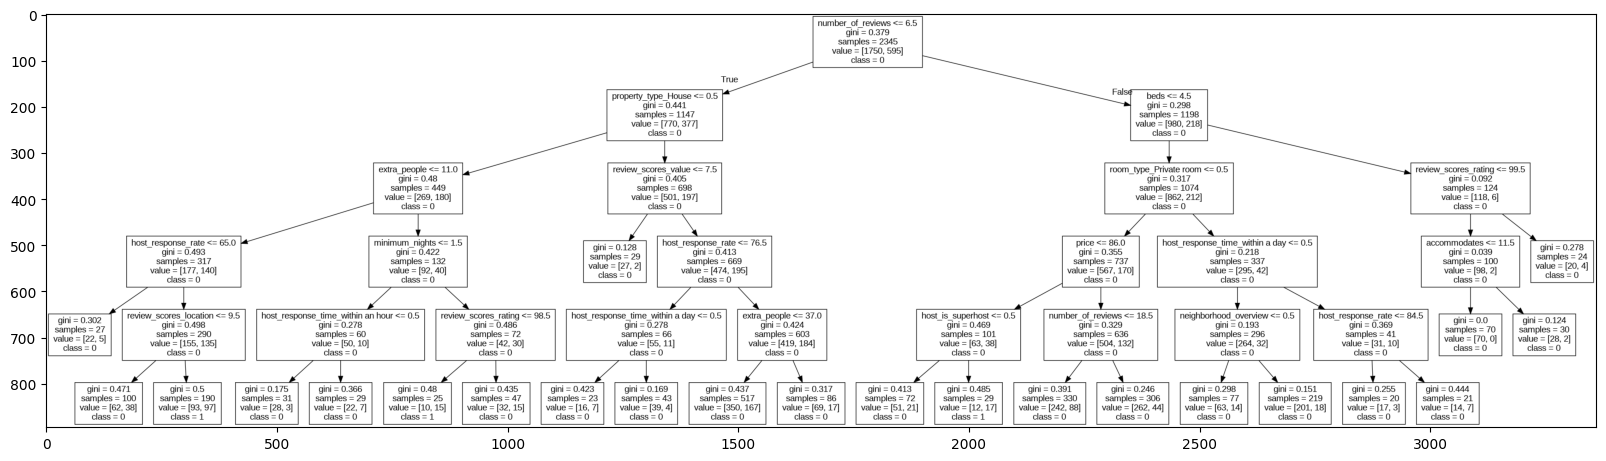

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7522
Precision: 0.5287
Recall.  : 0.2168

 -- test set -- 
Accuracy : 0.7117
Precision: 0.3391
Recall.  : 0.1542


    importance                                feature
24    0.348095                      number_of_reviews
43    0.089213                    property_type_House
9     0.079453                     host_response_rate
21    0.068388                           extra_people
52    0.060299                 room_type_Private room
0     0.057518                                  price
17    0.057238                                   beds
22    0.047435                         minimum_nights
10    0.041592                      host_is_superhost
25    0.039507                   review_scores_rating
31    0.031915                    review_scores_value
32    0.030919        host_response_time_within a day
30    0.025886                 review_scores_location
5     0.013113                  neighborhood_overview
34    0.007266      host_response_time_within an hour
14    0.002164                           accommodates
45    0.000000                     property_type_Loft
38    0.000000              

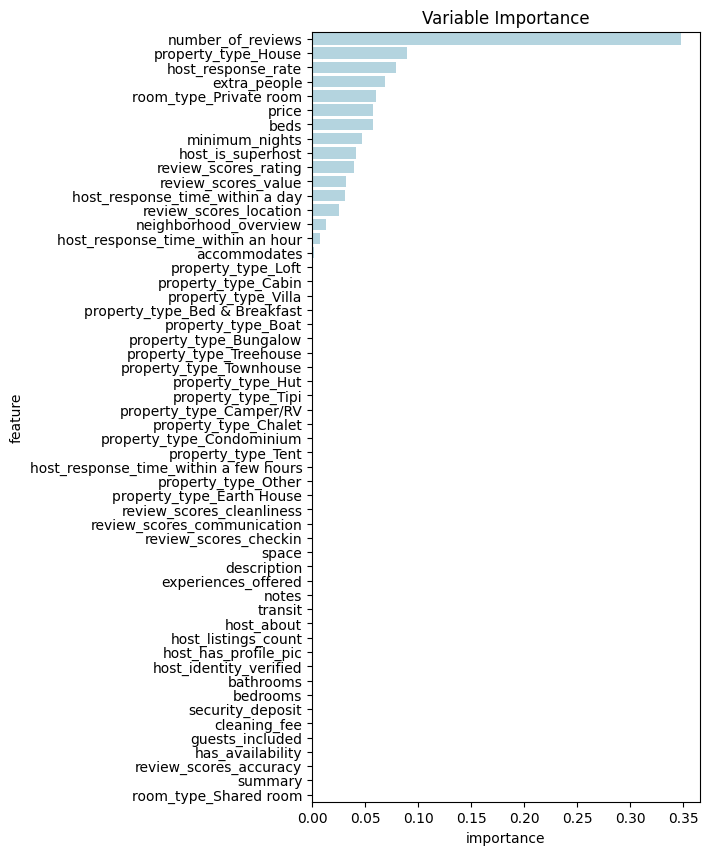

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# Guest Reviews Importance



In [ ]:
airbnb_ = airbnb_clean
X = airbnb_[['price', 'summary','space','description','experiences_offered','neighborhood_overview', 'notes', 'transit','host_about', 'host_response_time',
             'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified','property_type', 'room_type', 'accommodates', 'bathrooms',
             'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people','minimum_nights', 'has_availability', 'availability_30',
             'availability_60', 'availability_90', 'availability_365','number_of_reviews']]
y = airbnb_['review_scores_rating']
X = pd.get_dummies(X, columns = ['host_response_time','property_type', 'room_type'], drop_first=True)
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

In [ ]:
print(fullreg.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.083
Model:                              OLS   Adj. R-squared:                  0.070
Method:                   Least Squares   F-statistic:                     6.215
Date:                  Tue, 12 Dec 2023   Prob (F-statistic):           6.98e-36
Time:                          19:35:59   Log-Likelihood:                -11100.
No. Observations:                  3351   AIC:                         2.230e+04
Df Residuals:                      3302   BIC:                         2.260e+04
Df Model:                            48                                         
Covariance Type:              nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [ ]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                                 Variable        VIF
0                                   price   2.515005
1                                 summary   1.250700
2                                   space   1.557345
3                             description   0.000000
4                     experiences_offered   0.000000
5                   neighborhood_overview   2.571682
6                                   notes   1.340293
7                                 transit   2.629024
8                              host_about   1.174809
9                      host_response_rate   2.063382
10                      host_is_superhost   1.218109
11                    host_listings_count   1.827377
12                   host_has_profile_pic   1.009088
13                 host_identity_verified   1.082008
14                           accommodates   5.052842
15                              bathrooms   2.914185
16                               bedrooms   4.509544
17                                   beds   3.

In [ ]:
stepwise_selection(X,y)

Add  has_availability with p-value 0.0000
Add  host_listings_count with p-value 0.0000
Add  description with p-value 0.0000
Add  experiences_offered with p-value 0.0000
Add  host_is_superhost with p-value 0.0000
Add  cleaning_fee with p-value 0.0000
Add  availability_60 with p-value 0.0002
Add  host_response_rate with p-value 0.0047
Add  room_type_Shared room with p-value 0.0087


['has_availability',
 'host_listings_count',
 'description',
 'experiences_offered',
 'host_is_superhost',
 'cleaning_fee',
 'availability_60',
 'host_response_rate',
 'room_type_Shared room']

In [ ]:
X = X[['has_availability',
 'host_listings_count',
 'description',
 'experiences_offered',
 'host_is_superhost',
 'cleaning_fee',
 'availability_60',
 'host_response_rate',
 'room_type_Shared room']]
y = airbnb_['review_scores_rating']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

In [ ]:
print(fullreg.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.061
Model:                              OLS   Adj. R-squared:                  0.059
Method:                   Least Squares   F-statistic:                     36.10
Date:                  Tue, 12 Dec 2023   Prob (F-statistic):           1.40e-42
Time:                          19:36:33   Log-Likelihood:                -11140.
No. Observations:                  3351   AIC:                         2.229e+04
Df Residuals:                      3344   BIC:                         2.234e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
has_availa

In [ ]:
airbnb_clean['review_scores_rating'].value_counts()

100.0    1288
98.0      280
97.0      269
96.0      240
95.0      180
93.0      175
90.0      164
99.0      159
80.0      137
94.0      102
92.0       74
87.0       53
91.0       51
88.0       27
85.0       26
89.0       24
60.0       19
84.0       17
86.0       15
83.0       10
70.0        5
20.0        5
82.0        5
67.0        4
75.0        3
81.0        3
78.0        3
79.0        2
68.0        2
56.0        1
40.0        1
71.0        1
73.0        1
54.0        1
76.0        1
74.0        1
77.0        1
53.0        1
Name: review_scores_rating, dtype: int64

In [ ]:
def condition1(row):
    return 1 if row['review_scores_rating'] == 100 else 0

In [ ]:
airbnb_clean['good_reviews'] = airbnb_clean.apply(condition1, axis=1)

In [ ]:
X = airbnb_clean[['price', 'summary','space','description','experiences_offered','neighborhood_overview', 'notes', 'transit','host_about', 'host_response_time',
             'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified','property_type', 'room_type', 'accommodates', 'bathrooms',
             'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people','minimum_nights', 'has_availability']]
X = pd.get_dummies(X, columns = ['host_response_time','property_type', 'room_type'], drop_first=True)

In [ ]:
y = airbnb_clean['good_reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 3849 to 5579
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   price                                  2345 non-null   float64
 1   summary                                2345 non-null   int64  
 2   space                                  2345 non-null   int64  
 3   description                            2345 non-null   int64  
 4   experiences_offered                    2345 non-null   int64  
 5   neighborhood_overview                  2345 non-null   int64  
 6   notes                                  2345 non-null   int64  
 7   transit                                2345 non-null   int64  
 8   host_about                             2345 non-null   int64  
 9   host_response_rate                     2345 non-null   int64  
 10  host_is_superhost                      2345 non-null   int64  
 11  h

In [ ]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=10, ccp_alpha = 0)
# fit the model to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


'decision_tree.pdf'

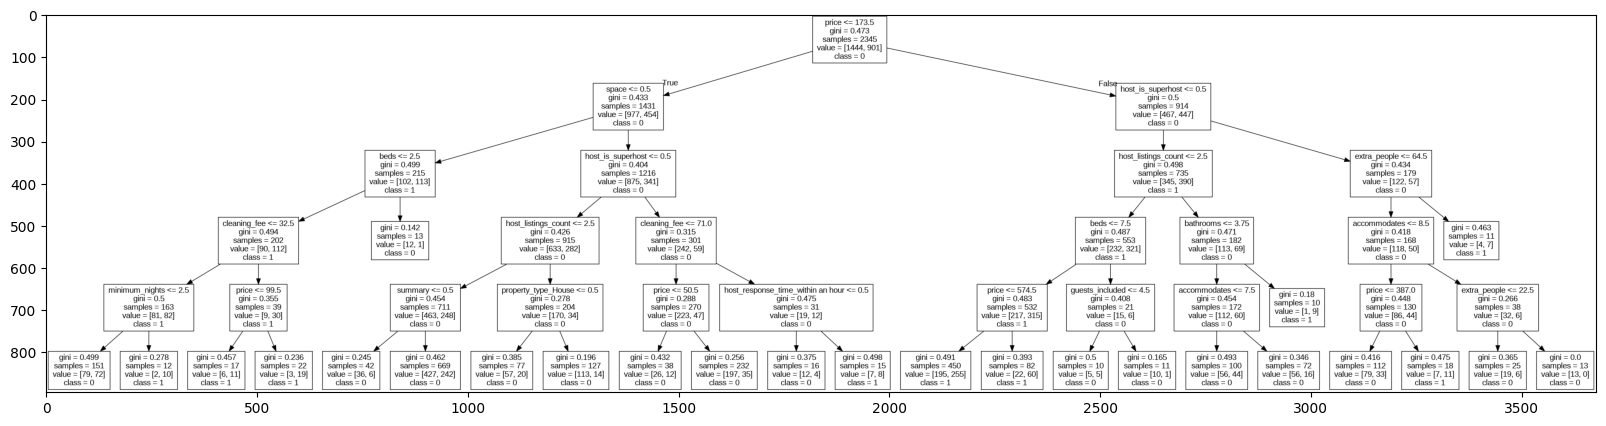

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [ ]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.6768
Precision: 0.6122
Recall.  : 0.4329

 -- test set -- 
Accuracy : 0.6302
Precision: 0.5249
Recall.  : 0.4083


# Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
X = airbnb_[['price', 'summary','space','description','experiences_offered','neighborhood_overview', 'notes', 'transit','host_about', 'host_response_time',
             'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified','property_type', 'room_type', 'accommodates', 'bathrooms',
             'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people','minimum_nights', 'has_availability', 'availability_30',
             'availability_60', 'availability_90', 'availability_365','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']]
X = pd.get_dummies(X, columns = ['host_response_time','property_type', 'room_type'], drop_first=True)
#Standardize Data
dfcolumns = X.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(X.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()



,price,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_about,host_response_rate,...,property_type_Loft,property_type_Other,property_type_Tent,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.721366,0.282706,0.387763,0.0,0.0,0.638273,0.951346,0.669901,-1.994793,0.464700,...,-0.130367,-0.088428,-0.051894,-0.017277,-0.093433,-0.029934,-0.038656,-1.564459,1.641523,-0.140645
1,-0.704300,0.282706,0.387763,0.0,0.0,0.638273,0.951346,0.669901,0.501305,0.464700,...,-0.130367,-0.088428,-0.051894,-0.017277,-0.093433,-0.029934,-0.038656,-1.564459,1.641523,-0.140645
2,-0.678701,0.282706,0.387763,0.0,0.0,0.638273,0.951346,0.669901,0.501305,0.464700,...,-0.130367,-0.088428,-0.051894,-0.017277,-0.093433,-0.029934,-0.038656,-1.564459,1.641523,-0.140645
3,-0.682968,0.282706,0.387763,0.0,0.0,0.638273,-1.051142,0.669901,0.501305,0.228042,...,-0.130367,-0.088428,-0.051894,-0.017277,-0.093433,-0.029934,-0.038656,-1.564459,1.641523,-0.140645
4,-0.678701,0.282706,0.387763,0.0,0.0,0.638273,-1.051142,0.669901,0.501305,0.228042,...,-0.130367,-0.088428,-0.051894,-0.017277,-0.093433,-0.029934,-0.038656,-1.564459,1.641523,-0.140645


In [ ]:
from sklearn.preprocessing import StandardScaler
X = airbnb_[['booked','price', 'summary','space','description','experiences_offered','neighborhood_overview', 'notes', 'transit','host_about',
             'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms',
             'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people','minimum_nights', 'has_availability', 'availability_30',
             'availability_60', 'availability_90', 'availability_365','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']]
#Standardize Data
dfcolumns = X.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(X.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()



,booked,price,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,host_about,...,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1.718037,-0.721366,0.282706,0.387763,0.0,0.0,0.638273,0.951346,0.669901,-1.994793,...,-0.752052,0.334929,-0.518759,0.651188,0.471276,0.524075,0.305335,0.291536,0.64936,0.653151
1,-0.582060,-0.704300,0.282706,0.387763,0.0,0.0,0.638273,0.951346,0.669901,0.501305,...,0.943444,0.788467,0.064279,0.507010,0.471276,0.524075,0.305335,0.291536,0.64936,0.653151
2,-0.582060,-0.678701,0.282706,0.387763,0.0,0.0,0.638273,0.951346,0.669901,0.501305,...,0.780415,-1.653658,-0.292022,-0.358056,0.471276,0.524075,0.305335,0.291536,0.64936,0.653151
3,-0.582060,-0.682968,0.282706,0.387763,0.0,0.0,0.638273,-1.051142,0.669901,0.501305,...,0.813021,0.753579,-0.453977,0.651188,-0.927526,0.524075,0.305335,0.291536,0.64936,0.653151
4,-0.582060,-0.678701,0.282706,0.387763,0.0,0.0,0.638273,-1.051142,0.669901,0.501305,...,0.943444,0.788467,-0.356804,0.651188,0.471276,0.524075,0.305335,0.291536,0.64936,0.653151


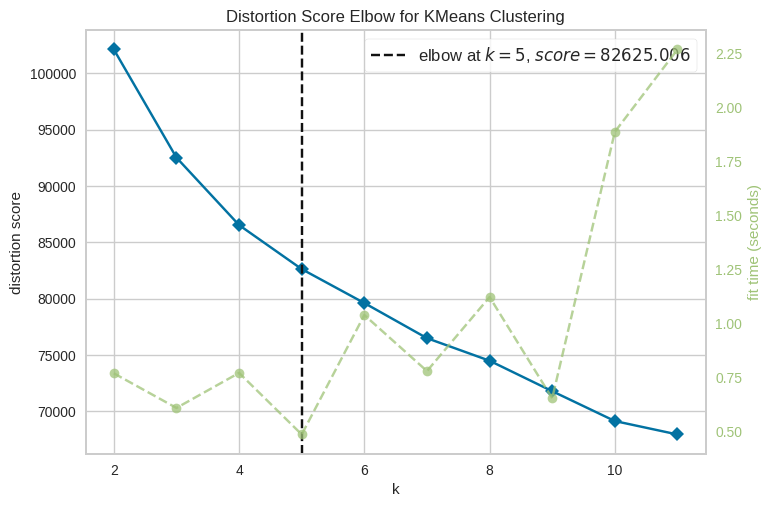

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

For n_clusters = 2 The average silhouette_score is : 0.12497697184082097
For n_clusters = 3 The average silhouette_score is : 0.1375931052875659
For n_clusters = 4 The average silhouette_score is : 0.13857311884953036
For n_clusters = 5 The average silhouette_score is : 0.11685990974036281
For n_clusters = 6 The average silhouette_score is : 0.11475291331287471
For n_clusters = 7 The average silhouette_score is : 0.1273159817100939


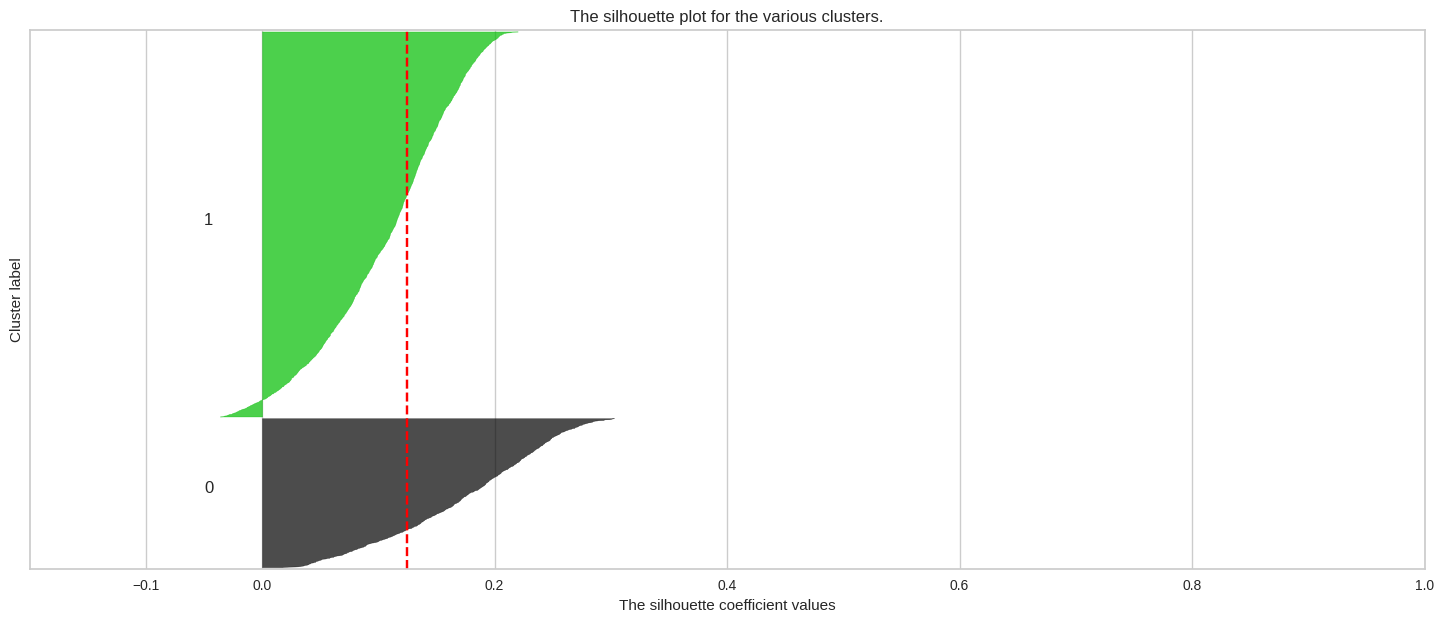

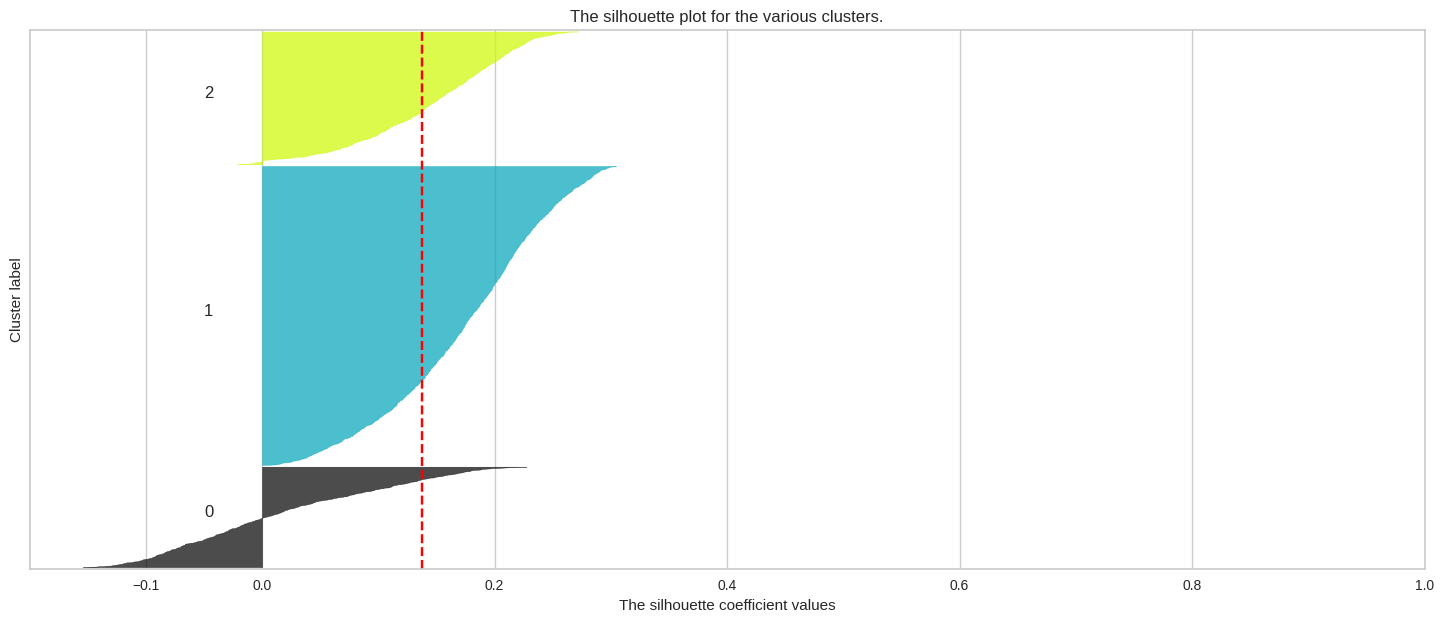

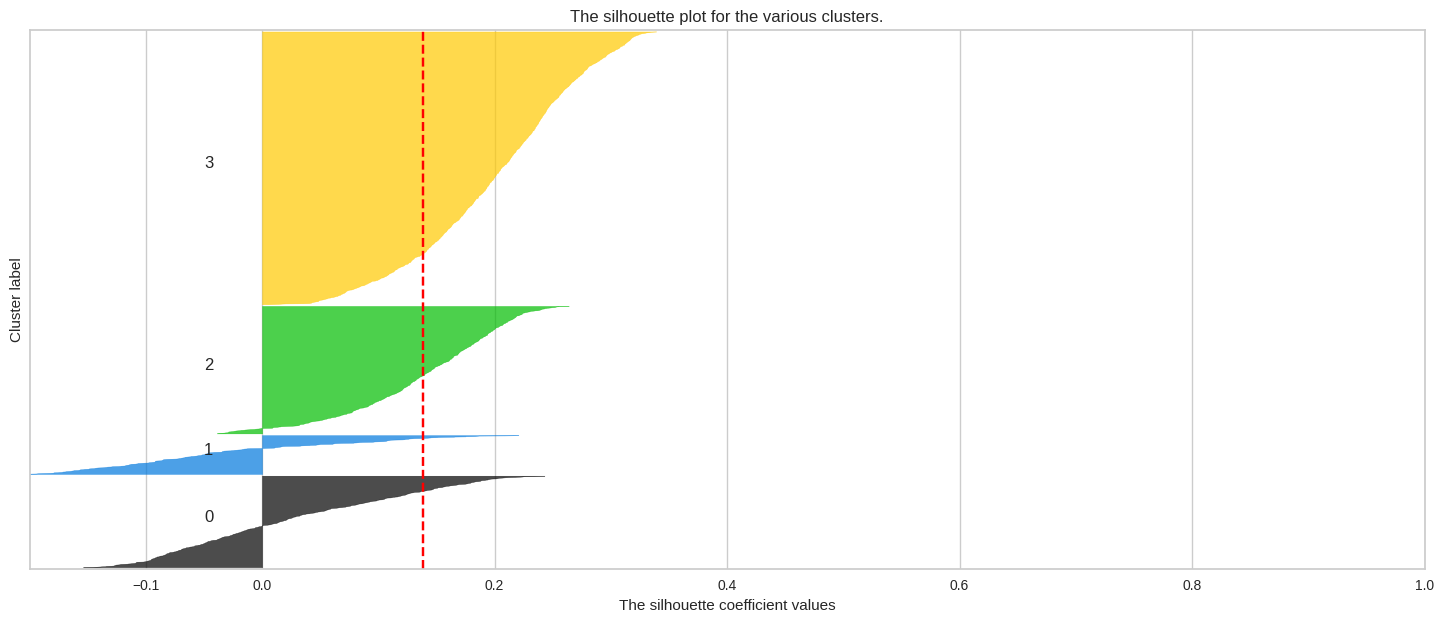

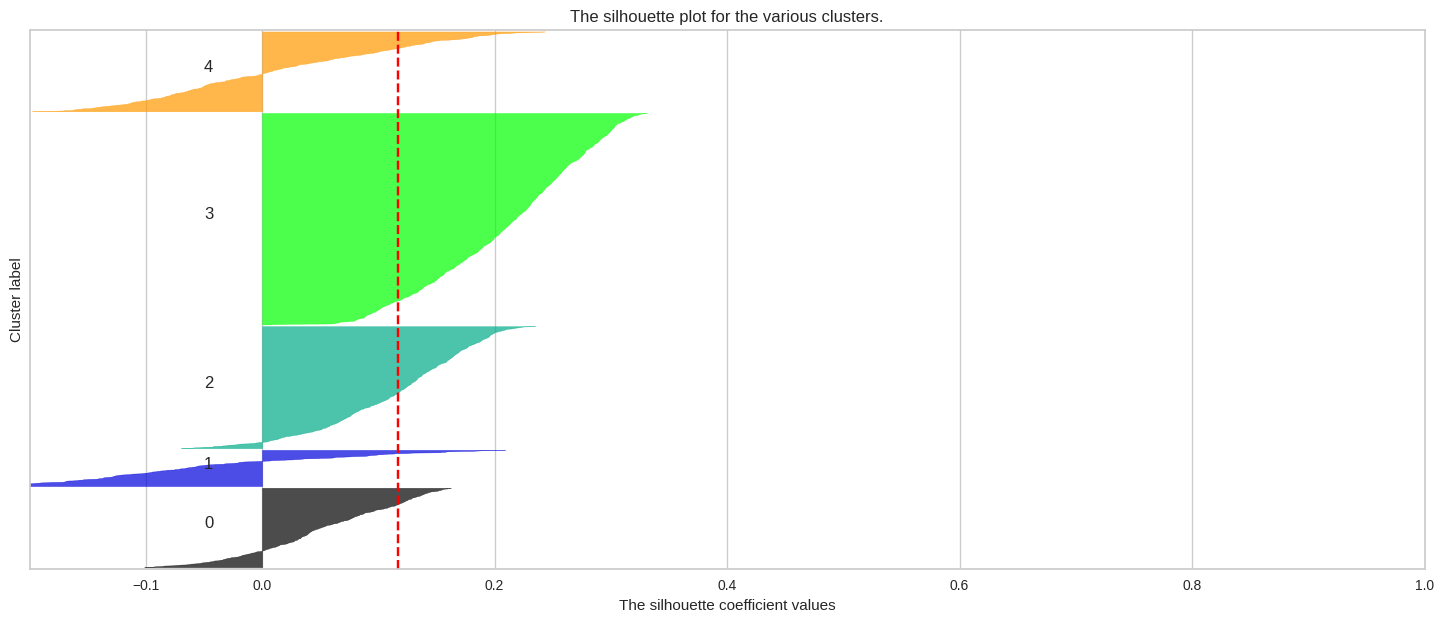

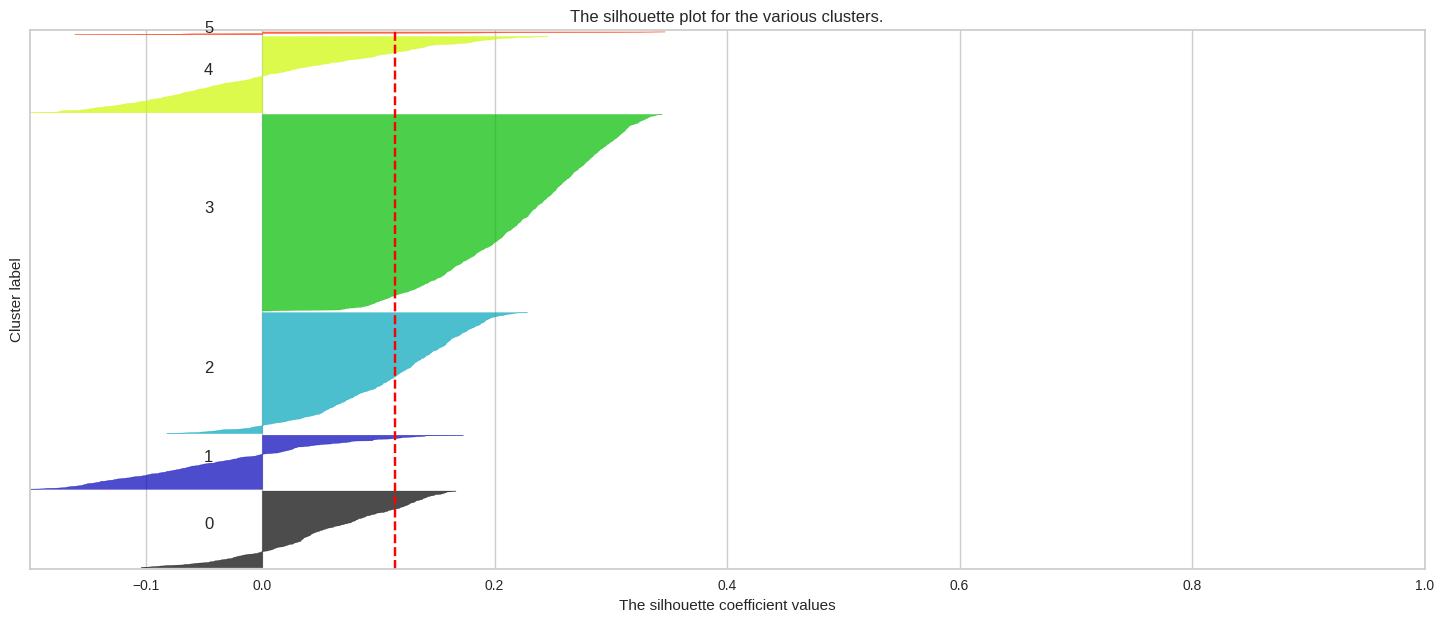

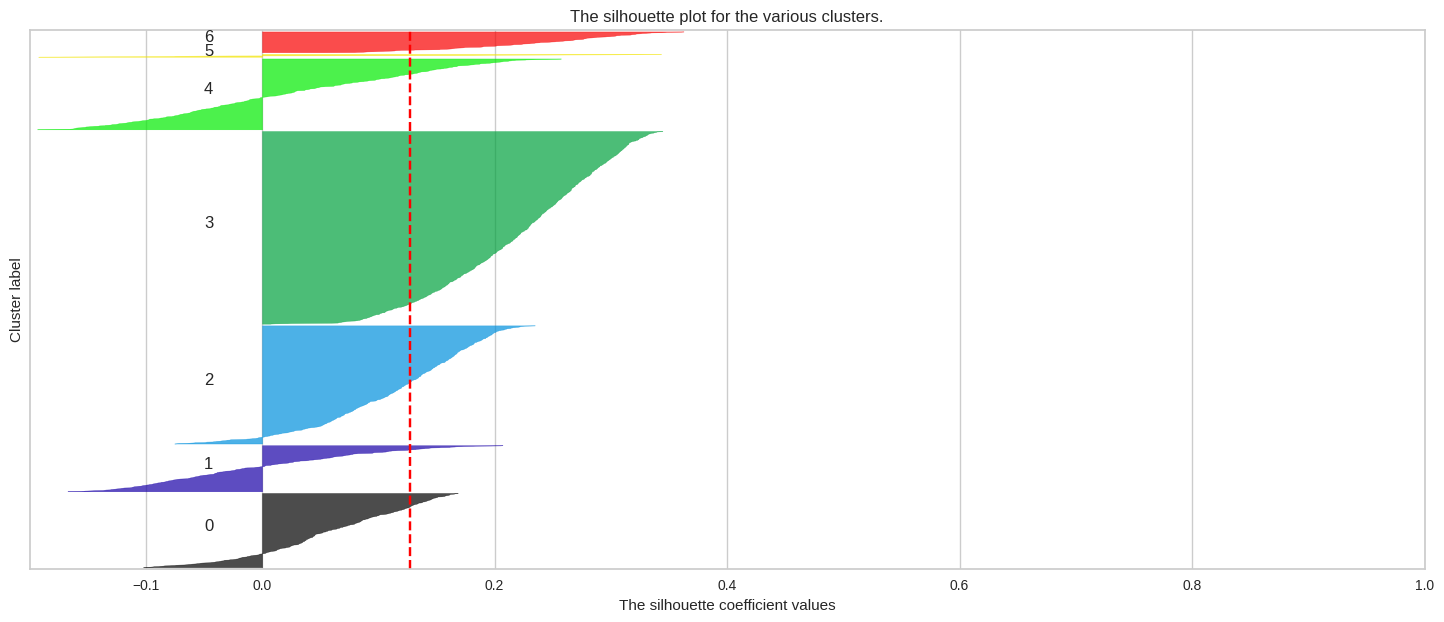

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X=df_scaled
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


In [ ]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=2, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

df = X
#append cluster to original data
df['cluster']=clusters

df.info()

# Evaluate cluster sizes to insure that they are similar
print(df['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = df.groupby('cluster').mean()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
     print(df_desc)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   booked                       3351 non-null   float64
 1   price                        3351 non-null   float64
 2   summary                      3351 non-null   float64
 3   space                        3351 non-null   float64
 4   description                  3351 non-null   float64
 5   experiences_offered          3351 non-null   float64
 6   neighborhood_overview        3351 non-null   float64
 7   notes                        3351 non-null   float64
 8   transit                      3351 non-null   float64
 9   host_about                   3351 non-null   float64
 10  host_response_rate           3351 non-null   float64
 11  host_is_superhost            3351 non-null   float64
 12  host_listings_count          3351 non-null   float64
 13  host_has_profile_p

price


<Figure size 800x400 with 0 Axes>

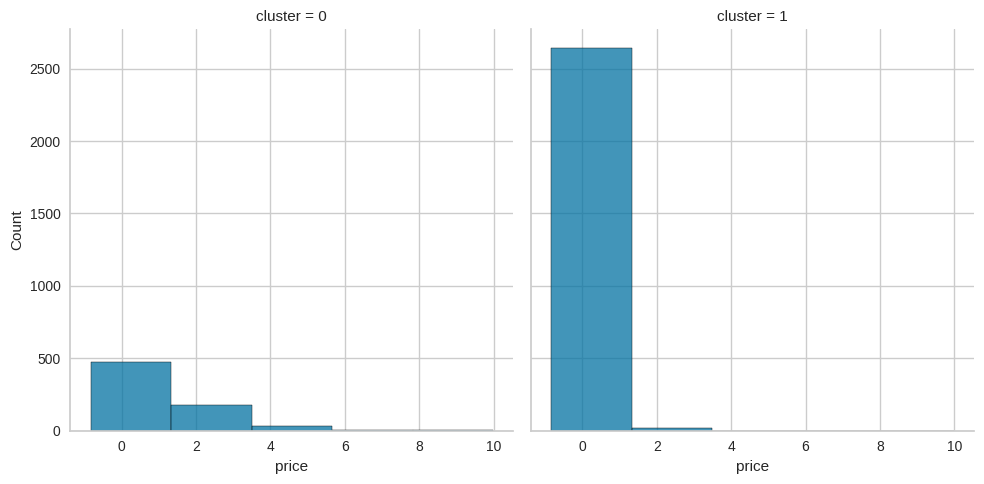

review_scores_rating


<Figure size 800x400 with 0 Axes>

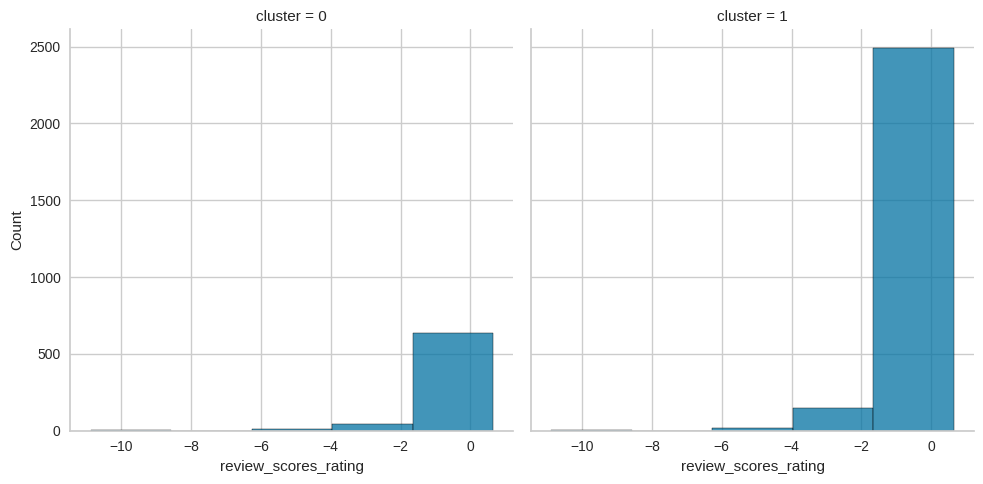

booked


<Figure size 800x400 with 0 Axes>

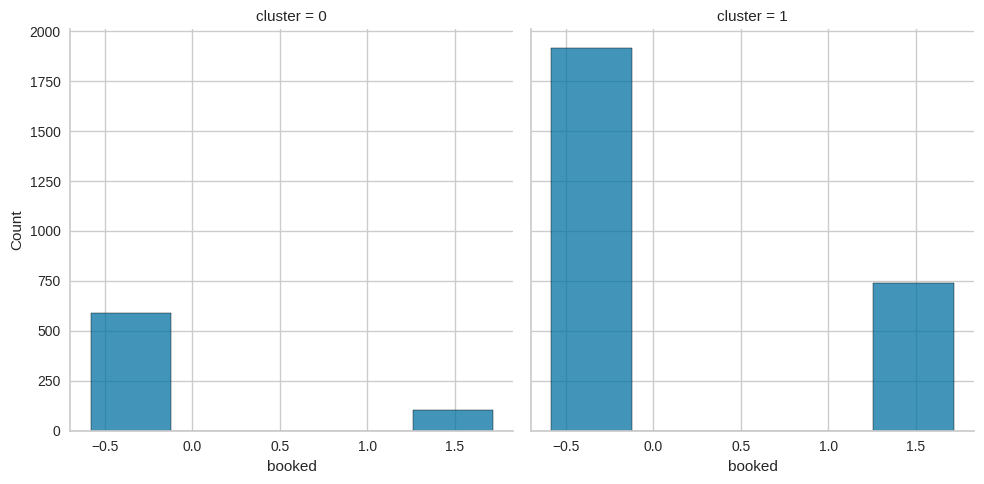

In [ ]:
# Price
for temp in {'price', 'booked', 'review_scores_rating'}:

  plt.figure(figsize=(8,4))
  print(temp)
  sns.displot(data=df, x=temp, bins=5, col='cluster', col_wrap=2, common_bins=True)
  plt.show()




In [ ]:
df['cluster'].value_counts()

1    2656
0     695
Name: cluster, dtype: int64